**Interactive notebook to make one time graph. Usefull to pull different dataset together and set custom filters to show relevant data.**

# Distributions (+/- treatment)

## Load data

In [385]:
import pandas as pd
import os
from Sequential_Fish.analysis.distributions import merge_data, safe_merge_no_duplicates
from Sequential_Fish.analysis.post_processing import RNA_filtering

In [386]:
Run_1 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-09-03 - SeqFISH_Run8 - HeLa_POLR2"  # no puro
Run_2 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-10-02 - SeqFISH_Run9 - HeLa _POLR2" # no puro
Run_3 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-10-09 - SeqFISH_Run10 - HeLa-Puro_POLR2"  # puro
output_path = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/analyse_sous_unite_polymerase/"
folder_name = "distributions_puro_no_puro"

In [398]:
Cell_data = pd.DataFrame()
for path, treatment in zip([Run_1, Run_2, Run_3], ["1.Run8(unt)","2.Run9(unt+aligned)", "3.Run10(puro)"]) :

    Acquisition = pd.read_feather(path + "/result_tables/Acquisition.feather")
    Detection = pd.read_feather(path + "/result_tables/Detection.feather")
    Spots = pd.read_feather(path + "/result_tables/Spots.feather")
    Gene_map = pd.read_feather(path + "/result_tables/Gene_map.feather")
    Cell = pd.read_feather(path + "/result_tables/Cell.feather")
    
    Detection, Cell, Spots = merge_data(
        Acquisition=Acquisition,
        Detection=Detection,
        Cell=Cell,
        Spots=Spots,
        Gene_map=Gene_map
    )
    
    Cell = safe_merge_no_duplicates(
        Cell,
        Detection,
        on='detection_id',
        keys='cycle'
    )
    
    Cell['treatment'] = treatment
    Cell['path'] = path
    
    Cell_data = pd.concat([
        Cell_data,
        Cell,
    ],axis=0)

In [399]:
Cell_data = Cell_data.loc[~Cell_data['target'].str.contains('Washout')]
Cell_data = Cell_data.loc[~(Cell_data['target'] == 'POLR2B_20')]
Cell_data = RNA_filtering(Cell_data)
Cell_data

,quantification_id,index_mean_distance_cell,index_median_distance_cell,index_mean_distance_nuc,index_median_distance_nuc,proportion_rna_in_nuc,nb_rna_out_nuc,nb_rna_in_nuc,index_rna_protrusion,proportion_rna_protrusion,...,acquisition_id,detection_id,cluster_number,rna_number,location,cell_id,target,cycle,treatment,path
0,0,0.92,0.85,1.49,2.58,0.15,134.0,24.0,0.00,0.00,...,0,1,8,158,Location-01,0,POLR2A,0,1.Run8(unt),/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
1,21,0.98,1.01,1.21,1.27,0.13,172.0,25.0,3.23,0.01,...,0,1,7,197,Location-01,1,POLR2A,0,1.Run8(unt),/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
2,42,0.84,0.84,1.18,1.35,0.21,118.0,32.0,0.00,0.00,...,0,1,4,150,Location-01,2,POLR2A,0,1.Run8(unt),/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
3,63,1.09,1.27,0.84,0.99,0.14,158.0,25.0,0.00,0.00,...,0,1,6,183,Location-01,3,POLR2A,0,1.Run8(unt),/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
4,84,0.91,1.01,0.96,1.16,0.13,141.0,21.0,0.00,0.00,...,0,1,8,162,Location-01,4,POLR2A,0,1.Run8(unt),/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8590,8666,1.08,1.10,0.79,0.95,0.33,26.0,13.0,0.00,0.00,...,189,226,0,39,Location-10,376,POLR2B,18,3.Run10(puro),/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
8591,8689,0.81,0.85,0.91,1.30,0.24,35.0,11.0,0.00,0.00,...,189,226,0,46,Location-10,377,POLR2B,18,3.Run10(puro),/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
8592,8712,0.94,1.00,1.08,1.47,0.20,24.0,6.0,0.00,0.00,...,189,226,0,30,Location-10,378,POLR2B,18,3.Run10(puro),/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
8593,8735,0.76,0.65,1.42,1.70,0.17,40.0,8.0,0.00,0.00,...,189,226,0,48,Location-10,379,POLR2B,18,3.Run10(puro),/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...


## Rename targets

optional if targets needs renaming

In [400]:
rule = {
    'POLR2A_0' : 'POLR2A', 
    'POLR2B_0' : 'POLR2B', 
}

Cell_data['target'] = Cell_data['target'].replace(rule)
Cell_data['target'].unique()

array(['POLR2A', 'POLR2B', 'POLR2C', 'POLR2E', 'POLR2F', 'POLR2H',
       'POLR2I', 'POLR2J', 'POLR2K', 'POLR2L'], dtype=object)

## Graph layout

Here customise the layout before running it for all measurements

In [401]:
import matplotlib.pyplot as plt
from Sequential_Fish.analysis.utils import get_colors_list, distribution_super_plot

In [402]:
grouped_data = Cell_data.groupby(['target', 'treatment'])['rna_number'].apply(list)
grouped_data.sort_index(level=[0,1], ascending=[True,False])

target  treatment          
POLR2A  3.Run10(puro)          [282, 154, 122, 188, 143, 264, 256, 209, 267, ...
        2.Run9(unt+aligned)    [105, 48, 112, 118, 256, 138, 150, 136, 96, 12...
        1.Run8(unt)            [158, 197, 150, 183, 162, 132, 209, 226, 171, ...
POLR2B  3.Run10(puro)          [59, 26, 18, 46, 39, 38, 62, 18, 55, 48, 29, 1...
        2.Run9(unt+aligned)    [105, 57, 102, 83, 255, 139, 205, 126, 88, 206...
        1.Run8(unt)            [119, 137, 102, 151, 121, 80, 161, 145, 125, 9...
POLR2C  3.Run10(puro)          [78, 37, 26, 75, 35, 46, 63, 46, 68, 31, 40, 2...
        2.Run9(unt+aligned)    [57, 34, 46, 21, 65, 48, 68, 54, 24, 66, 40, 3...
        1.Run8(unt)            [99, 134, 108, 150, 123, 111, 162, 135, 115, 1...
POLR2E  3.Run10(puro)          [112, 49, 43, 128, 101, 91, 100, 79, 134, 85, ...
        2.Run9(unt+aligned)    [102, 50, 78, 105, 238, 77, 110, 123, 105, 138...
        1.Run8(unt)            [142, 224, 197, 200, 113, 98, 210, 184, 166, 1...


target  treatment          
POLR2A  1.Run8(unt)             [0]
        2.Run9(unt+aligned)    [18]
        3.Run10(puro)           [0]
POLR2B  1.Run8(unt)             [2]
        2.Run9(unt+aligned)     [0]
        3.Run10(puro)          [18]
POLR2C  1.Run8(unt)             [4]
        2.Run9(unt+aligned)    [16]
        3.Run10(puro)          [16]
POLR2E  1.Run8(unt)             [6]
        2.Run9(unt+aligned)    [14]
        3.Run10(puro)          [14]
POLR2F  1.Run8(unt)             [8]
        2.Run9(unt+aligned)    [12]
        3.Run10(puro)          [12]
POLR2H  1.Run8(unt)            [10]
        2.Run9(unt+aligned)    [10]
        3.Run10(puro)          [10]
POLR2I  1.Run8(unt)            [12]
        2.Run9(unt+aligned)     [4]
        3.Run10(puro)           [4]
POLR2J  1.Run8(unt)            [14]
        2.Run9(unt+aligned)     [8]
        3.Run10(puro)           [8]
POLR2K  1.Run8(unt)            [16]
        2.Run9(unt+aligned)     [2]
        3.Run10(puro)           [2]


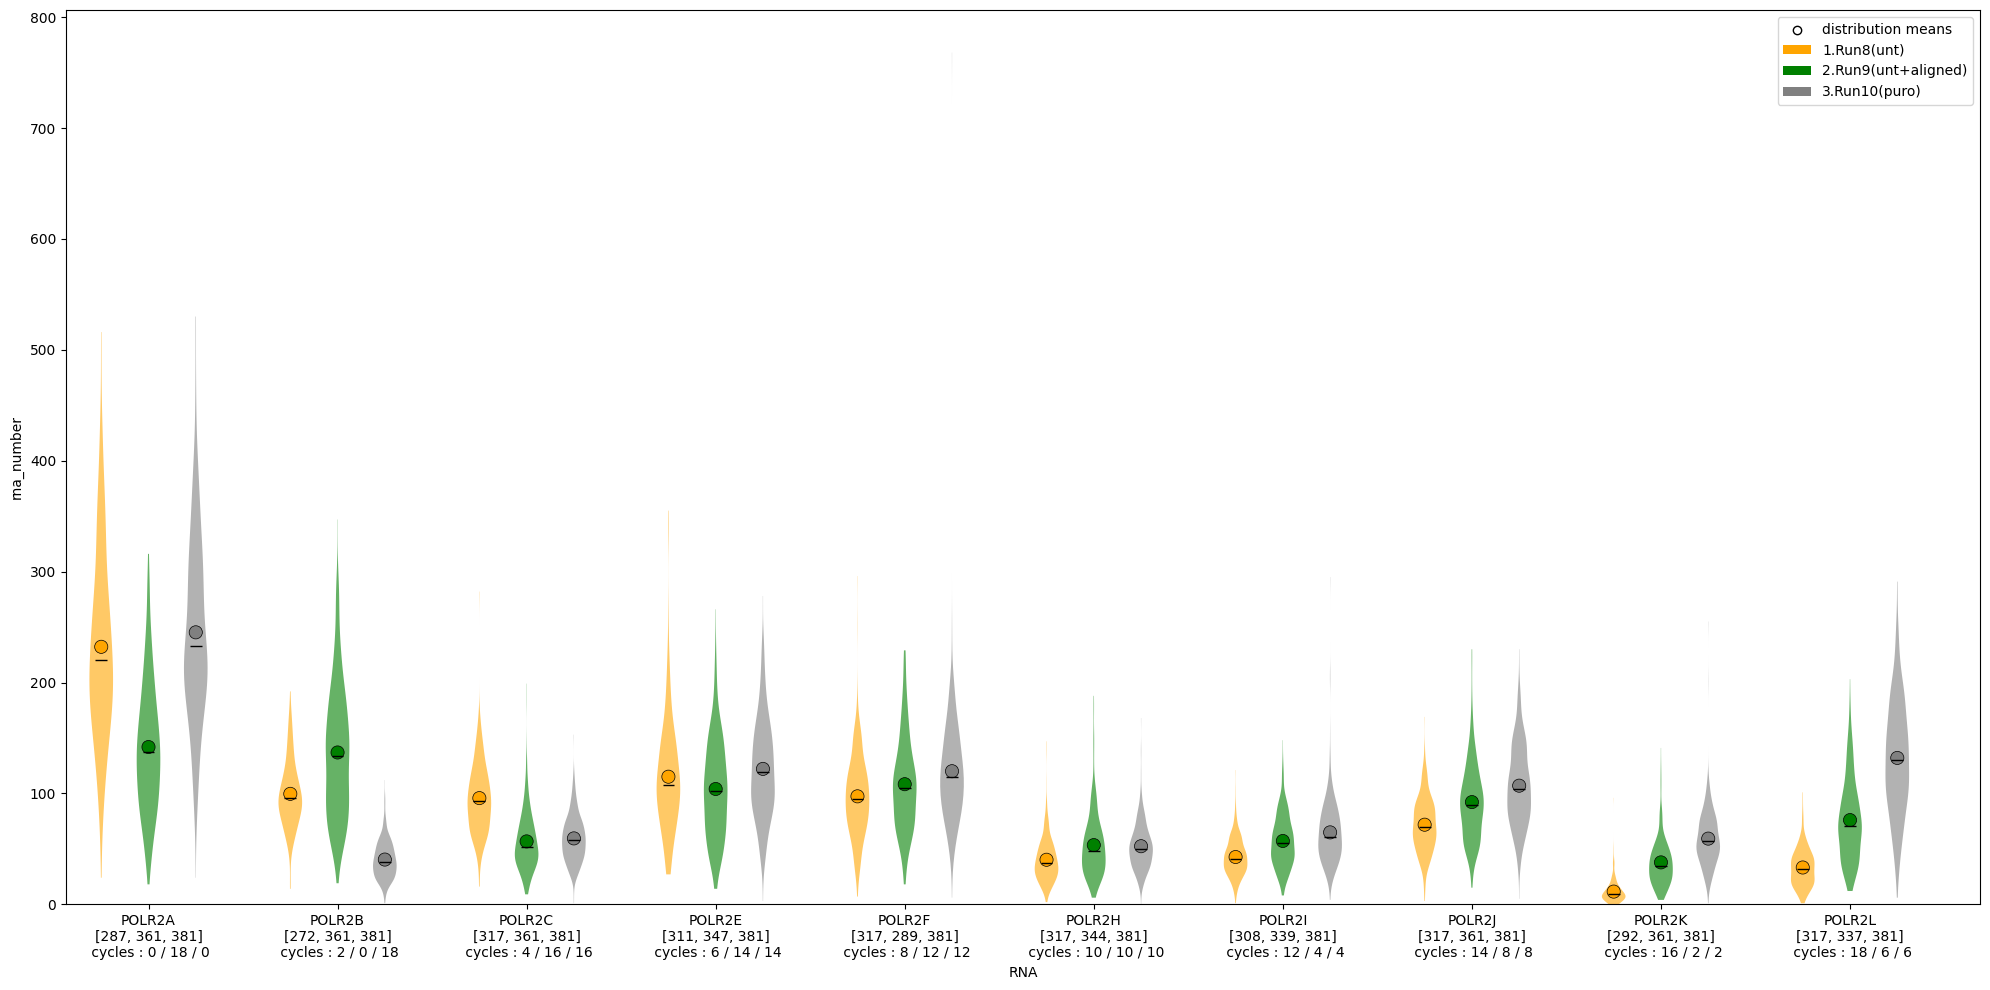

In [416]:
measure_test = 'rna_number'
def distribution_graph(
    Cell_data : pd.DataFrame,
    measure = measure_test,
) :
    
    order_ascending = [True, True]
    
    grouped_data = Cell_data.groupby(['target', 'treatment'])[measure].apply(list)
    grouped_data = grouped_data.sort_index(level=[0,1], ascending=order_ascending)
    print(Cell_data.groupby(['target', 'treatment'])['cycle'].unique())
    grouped_cycles = Cell_data.groupby(['target', 'treatment'])['cycle'].unique().apply(int)
    print(grouped_cycles)
    
    
    labels = list(grouped_data.index.get_level_values(1).unique())
    print(labels)
    
    cycles_exp1 = grouped_cycles.xs(key=labels[0],axis=0,level=1)
    cycles_exp2 = grouped_cycles.xs(key=labels[1],axis=0,level=1)
    cycles_exp3 = grouped_cycles.xs(key=labels[2],axis=0,level=1)
    
    fig = plt.figure(figsize=(20,10), frameon=False)
    ax = fig.gca()
    ax = distribution_super_plot(
        grouped_data,
        ax=ax,
        title='',
        xlabel='RNA',
        ylabel=measure,
        colors = ['orange','green','gray'],
        sort_parameters = {'level' : [0,1], 'ascending' : order_ascending}
    )
    
    if 'index' in measure :
        min_x,max_x,min_y,max_y = plt.axis()
        ax.plot([min_x, max_x], [1,1], '--b')
    
    xtickslabels = ax.get_xticklabels()
    xlabels = [text.get_text() for text in xtickslabels]
    
    label_index = 0
    for label, cycle_ex1, cycle_ex2, cycle_ex3 in zip(xlabels, cycles_exp1, cycles_exp2, cycles_exp3) :
        xlabels[label_index] = label + f"\n cycles : {cycle_ex1} / {cycle_ex2} / {cycle_ex3}"
        label_index +=1
    
    ax.set_xticklabels(xlabels)
    
    
    plt.tight_layout()
    return fig

fig = distribution_graph(Cell_data)

## Plot all

In [326]:
# measures = []
# or :
from Sequential_Fish.analysis.analysis_parameters import distribution_measures as measures

In [327]:
os.makedirs(f"{output_path}/{folder_name}/",exist_ok=True)

for measure in measures:
    fig = distribution_graph(
        Cell_data,
        measure=measure
    )
    
    fig.savefig(f"{output_path}/{folder_name}/{measure}.svg")
    plt.close()


target  treatment
POLR2A  puro          [0]
        untreated    [18]
POLR2B  puro         [18]
        untreated     [0]
POLR2C  puro         [16]
        untreated    [16]
POLR2E  puro         [14]
        untreated    [14]
POLR2F  puro         [12]
        untreated    [12]
POLR2H  puro         [10]
        untreated    [10]
POLR2I  puro          [4]
        untreated     [4]
POLR2J  puro          [8]
        untreated     [8]
POLR2K  puro          [2]
        untreated     [2]
POLR2L  puro          [6]
        untreated     [6]
Name: cycle, dtype: object
target  treatment
POLR2A  puro          0
        untreated    18
POLR2B  puro         18
        untreated     0
POLR2C  puro         16
        untreated    16
POLR2E  puro         14
        untreated    14
POLR2F  puro         12
        untreated    12
POLR2H  puro         10
        untreated    10
POLR2I  puro          4
        untreated     4
POLR2J  puro          8
        untreated     8
POLR2K  puro          2
        u

/home/floric/miniconda3/envs/dev/lib/python3.8/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


# Cell number

## Load data

In [328]:
import pandas as pd
import os
from Sequential_Fish.analysis.distributions import merge_data
from Sequential_Fish.analysis.post_processing import RNA_filtering

In [329]:
Run_1 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-09-03 - SeqFISH_Run8 - HeLa_POLR2" # no puro
Run_2 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-10-09 - SeqFISH_Run10 - HeLa-Puro_POLR2"  # puro

In [330]:
Cell_data = pd.DataFrame()
for path, treatment in zip([Run_1, Run_2], ["untreated", "puro"]) :

    Acquisition = pd.read_feather(path + "/result_tables/Acquisition.feather")
    Detection = pd.read_feather(path + "/result_tables/Detection.feather")
    Spots = pd.read_feather(path + "/result_tables/Spots.feather")
    Gene_map = pd.read_feather(path + "/result_tables/Gene_map.feather")
    Cell = pd.read_feather(path + "/result_tables/Cell.feather")
    
    Detection, Cell, Spots = merge_data(
        Acquisition=Acquisition,
        Detection=Detection,
        Cell=Cell,
        Spots=Spots,
        Gene_map=Gene_map
    )
    
    Cell['treatment'] = treatment
    Cell['path'] = path
    
    Cell_data = pd.concat([
        Cell_data,
        Cell,
    ],axis=0)

In [331]:
Cell_data = Cell_data.loc[~Cell_data['target'].str.contains('Washout')]
Cell_data = RNA_filtering(Cell_data)
Cell_data

,quantification_id,index_mean_distance_cell,index_median_distance_cell,index_mean_distance_nuc,index_median_distance_nuc,proportion_rna_in_nuc,nb_rna_out_nuc,nb_rna_in_nuc,index_rna_protrusion,proportion_rna_protrusion,...,nucleus_mean_median_signal,acquisition_id,detection_id,cluster_number,rna_number,location,cell_id,target,treatment,path
0,0,0.92,0.85,1.49,2.58,0.15,134.0,24.0,0.00,0.00,...,4664.5,0,1,8,158,Location-01,0,POLR2A,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
1,21,0.98,1.01,1.21,1.27,0.13,172.0,25.0,3.23,0.01,...,6012.0,0,1,7,197,Location-01,1,POLR2A,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
2,42,0.84,0.84,1.18,1.35,0.21,118.0,32.0,0.00,0.00,...,6467.0,0,1,4,150,Location-01,2,POLR2A,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
3,63,1.09,1.27,0.84,0.99,0.14,158.0,25.0,0.00,0.00,...,7295.0,0,1,6,183,Location-01,3,POLR2A,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
4,84,0.91,1.01,0.96,1.16,0.13,141.0,21.0,0.00,0.00,...,3832.0,0,1,8,162,Location-01,4,POLR2A,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8590,8666,1.08,1.10,0.79,0.95,0.33,26.0,13.0,0.00,0.00,...,21858.0,189,226,0,39,Location-10,376,POLR2B,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
8591,8689,0.81,0.85,0.91,1.30,0.24,35.0,11.0,0.00,0.00,...,24707.0,189,226,0,46,Location-10,377,POLR2B,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
8592,8712,0.94,1.00,1.08,1.47,0.20,24.0,6.0,0.00,0.00,...,18413.5,189,226,0,30,Location-10,378,POLR2B,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
8593,8735,0.76,0.65,1.42,1.70,0.17,40.0,8.0,0.00,0.00,...,23423.0,189,226,0,48,Location-10,379,POLR2B,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...


## Rename targets

optional if targets needs renaming

In [332]:
rule = {
    'POLR2A_0' : 'POLR2A' 
}

Cell_data['target'] = Cell_data['target'].replace(rule)
Cell_data['target'].unique()

array(['POLR2A', 'POLR2B', 'POLR2C', 'POLR2E', 'POLR2F', 'POLR2H',
       'POLR2I', 'POLR2J', 'POLR2K', 'POLR2L'], dtype=object)

In [333]:
Cell_data.groupby(['treatment'], as_index=False).agg({
    'cell_id' : 'nunique'
})

,treatment,cell_id
0,puro,381
1,untreated,317


## Plot

In [334]:
import matplotlib.pyplot as plt

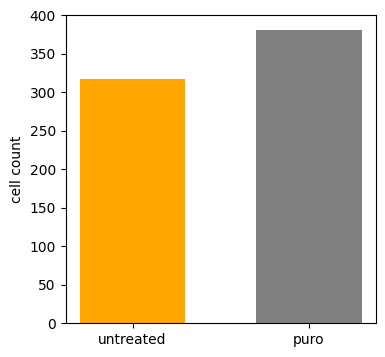

In [335]:
data = Cell_data.groupby(['treatment'], as_index=False).agg({
    'cell_id' : 'nunique'
}).sort_values('treatment', ascending=False)

cell_number_fig = plt.figure(figsize=(4,4), frameon=False)
ax = cell_number_fig.gca()
ax.bar(
    x= data['treatment'],
    height= data['cell_id'],
    color = ['orange', 'gray'],
    width=0.6
)
ax.set_ylabel('cell count')


plt.show()

### save fig

In [336]:
import os
output_path = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/analyse_sous_unite_polymerase/"
folder_name = ""
os.makedirs(f"{output_path}/{folder_name}/", exist_ok=True)
cell_number_fig.savefig(f"{output_path}/{folder_name}/cell_number.svg")


# Cell area

In [337]:
import pandas as pd
import os
from Sequential_Fish.analysis.distributions import merge_data
from Sequential_Fish.analysis.post_processing import RNA_filtering

In [338]:
Run_1 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-09-03 - SeqFISH_Run8 - HeLa_POLR2" # no puro
Run_2 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-10-02 - SeqFISH_Run9 - HeLa _POLR2"  # puro
Run_3 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-10-09 - SeqFISH_Run10 - HeLa-Puro_POLR2"  # puro

In [339]:
Cell_data = pd.DataFrame()
for path, treatment in zip([Run_1, Run_2, Run_3], ["untreated", "untreated", "puro"]) :

    Acquisition = pd.read_feather(path + "/result_tables/Acquisition.feather")
    Detection = pd.read_feather(path + "/result_tables/Detection.feather")
    Spots = pd.read_feather(path + "/result_tables/Spots.feather")
    Gene_map = pd.read_feather(path + "/result_tables/Gene_map.feather")
    Cell = pd.read_feather(path + "/result_tables/Cell.feather")
    
    Detection, Cell, Spots = merge_data(
        Acquisition=Acquisition,
        Detection=Detection,
        Cell=Cell,
        Spots=Spots,
        Gene_map=Gene_map
    )
    
    Cell['treatment'] = treatment
    Cell['path'] = path
    
    Cell_data = pd.concat([
        Cell_data,
        Cell,
    ],axis=0)

In [340]:
Cell_data = Cell_data.loc[~Cell_data['target'].str.contains('Washout')]
Cell_data = RNA_filtering(Cell_data)
Cell_data

,quantification_id,index_mean_distance_cell,index_median_distance_cell,index_mean_distance_nuc,index_median_distance_nuc,proportion_rna_in_nuc,nb_rna_out_nuc,nb_rna_in_nuc,index_rna_protrusion,proportion_rna_protrusion,...,nucleus_mean_median_signal,acquisition_id,detection_id,cluster_number,rna_number,location,cell_id,target,treatment,path
0,0,0.92,0.85,1.49,2.58,0.15,134.0,24.0,0.00,0.00,...,4664.5,0,1,8,158,Location-01,0,POLR2A,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
1,21,0.98,1.01,1.21,1.27,0.13,172.0,25.0,3.23,0.01,...,6012.0,0,1,7,197,Location-01,1,POLR2A,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
2,42,0.84,0.84,1.18,1.35,0.21,118.0,32.0,0.00,0.00,...,6467.0,0,1,4,150,Location-01,2,POLR2A,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
3,63,1.09,1.27,0.84,0.99,0.14,158.0,25.0,0.00,0.00,...,7295.0,0,1,6,183,Location-01,3,POLR2A,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
4,84,0.91,1.01,0.96,1.16,0.13,141.0,21.0,0.00,0.00,...,3832.0,0,1,8,162,Location-01,4,POLR2A,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8590,8666,1.08,1.10,0.79,0.95,0.33,26.0,13.0,0.00,0.00,...,21858.0,189,226,0,39,Location-10,376,POLR2B,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
8591,8689,0.81,0.85,0.91,1.30,0.24,35.0,11.0,0.00,0.00,...,24707.0,189,226,0,46,Location-10,377,POLR2B,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
8592,8712,0.94,1.00,1.08,1.47,0.20,24.0,6.0,0.00,0.00,...,18413.5,189,226,0,30,Location-10,378,POLR2B,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
8593,8735,0.76,0.65,1.42,1.70,0.17,40.0,8.0,0.00,0.00,...,23423.0,189,226,0,48,Location-10,379,POLR2B,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...


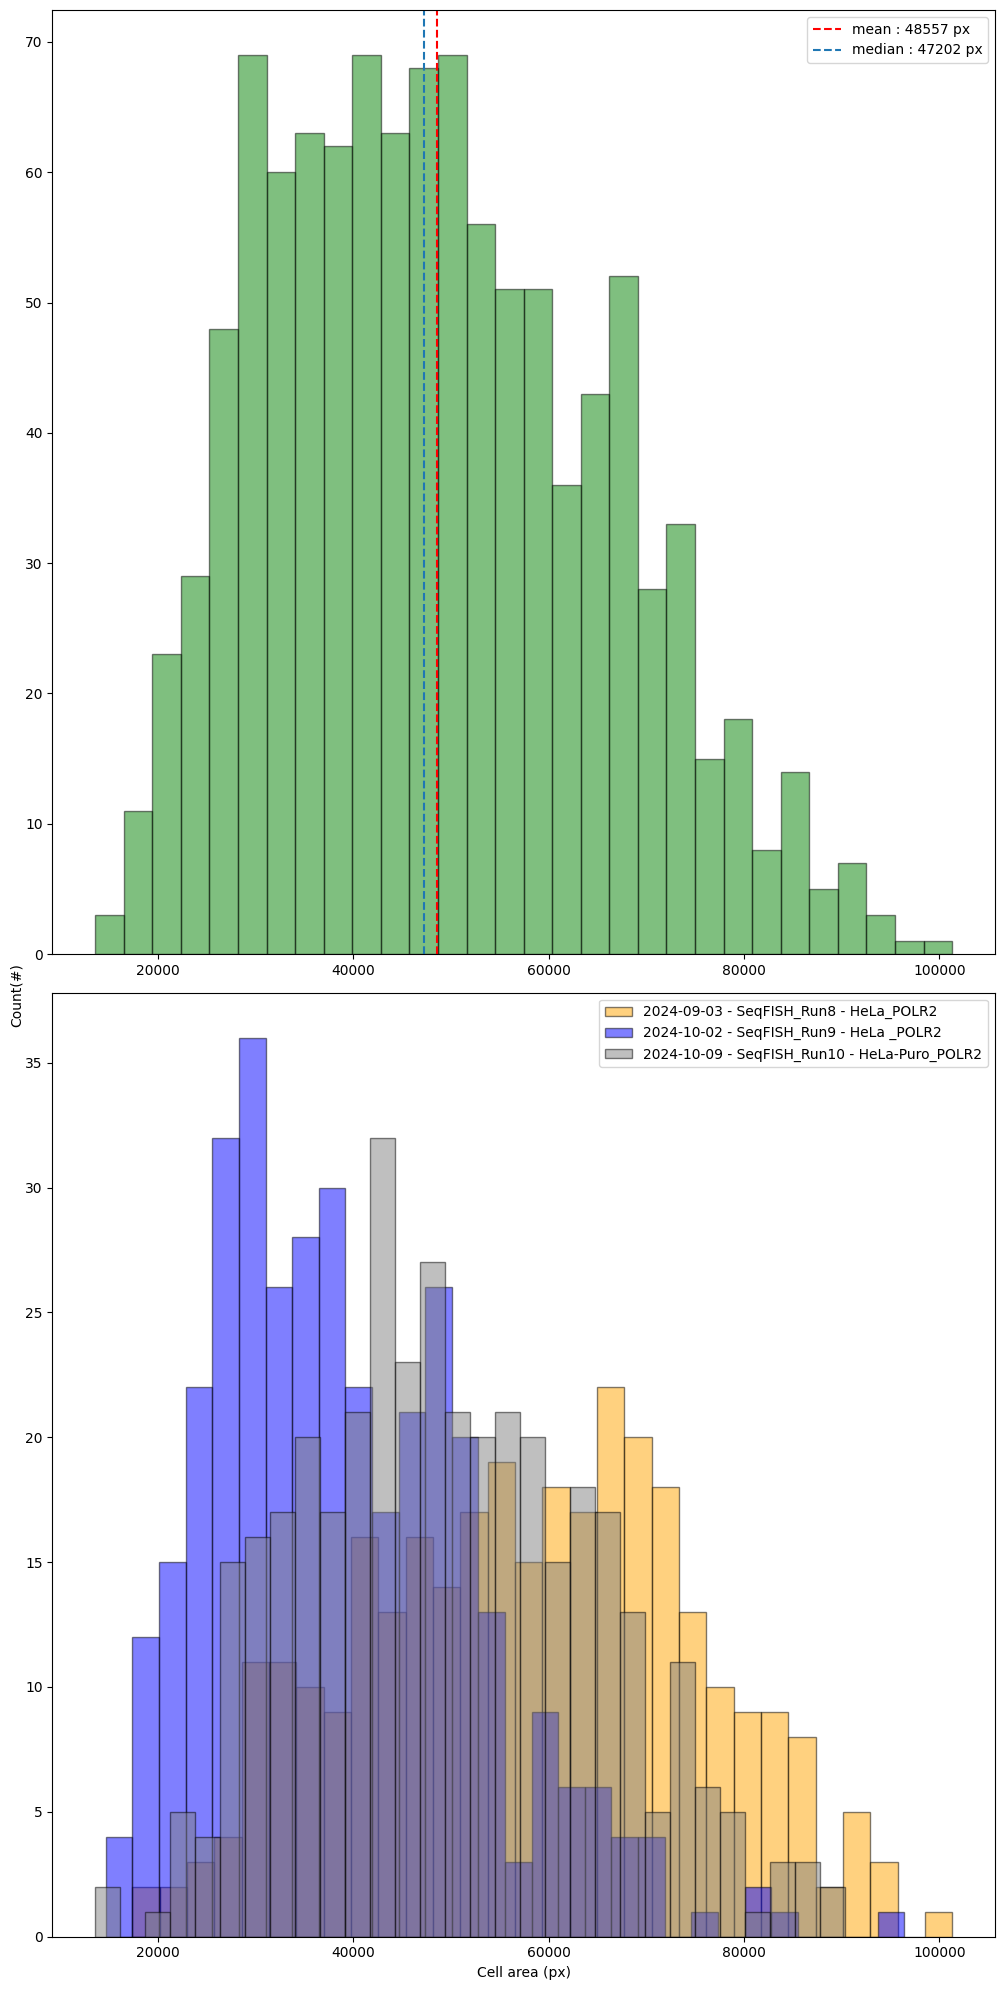

In [341]:
import os
def area_graph(
    Cell_data : pd.DataFrame,
) :
    
    fig = plt.figure(figsize=(10,20), frameon=True)
    top,bottom = fig.subplots(2,1)
    
    
    data = Cell_data.groupby(['path', 'cell_id'])['cell_area'].first()
    grouped_data = data.groupby('path', level=0).apply(list)
    colors = ['orange','blue','gray']
    
    for index, color in zip(grouped_data.index, colors) :
        sub_data = grouped_data.loc[index]
        bottom.hist(
        sub_data,
        bins=30,
        color=color,
        alpha = 0.5,
        label = os.path.basename(index),
        edgecolor = 'black',
        )
    
    bottom.legend()
    
    count,bins,_ = top.hist(
        data,
        bins=30,
        color='green',
        alpha = 0.5,
        edgecolor = 'black',
        )
    
    mean_area, median_area = data.mean(), data.median()
    xmin,xmax,ymin,ymax = top.axis()
    
    top.plot([mean_area,mean_area], [0, xmax], '--r', label= f'mean : {round(mean_area)} px')
    top.plot([median_area,median_area], [0, xmax], '--', label=f'median : {round(median_area)} px')
    
    top.axis([xmin,xmax,ymin,ymax])
    top.legend()
    
    bottom.set_xlabel('Cell area (px)')
    fig.text(0.00,0.5,"Count(#)", rotation=90, va='center')
    
    plt.tight_layout()
    return fig

fig = area_graph(Cell_data)

# Thresholds (+/- treatment)

## Load data

In [342]:
import pandas as pd
import os
from Sequential_Fish.analysis.distributions import merge_data, safe_merge_no_duplicates
from Sequential_Fish.analysis.post_processing import RNA_filtering

In [343]:
Run_1 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-09-03 - SeqFISH_Run8 - HeLa_POLR2" # no puro
Run_2 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-10-09 - SeqFISH_Run10 - HeLa-Puro_POLR2"  # puro

In [344]:
Detection_data = pd.DataFrame()
for path, treatment in zip([Run_1, Run_2], ["untreated", "puro"]) :

    Acquisition = pd.read_feather(path + "/result_tables/Acquisition.feather")
    Detection = pd.read_feather(path + "/result_tables/Detection.feather")
    Spots = pd.read_feather(path + "/result_tables/Spots.feather")
    Gene_map = pd.read_feather(path + "/result_tables/Gene_map.feather")
    Cell = pd.read_feather(path + "/result_tables/Cell.feather")
    
    Detection, Cell, Spots = merge_data(
        Acquisition=Acquisition,
        Detection=Detection,
        Cell=Cell,
        Spots=Spots,
        Gene_map=Gene_map
    )
    
    Detection['treatment'] = treatment
    Detection['path'] = path
    
    Detection_data = pd.concat([
        Detection_data,
        Detection,
    ],axis=0)

In [345]:
Detection_data = Detection_data.loc[~Detection_data['target'].str.contains('Washout')]
Detection_data = RNA_filtering(Detection_data)
Detection_data

,detection_id,acquisition_id,visual_name,filename,voxel_size,spot_size,alpha,beta,gamma,artifact_radius,...,Threshold_0,threshold,color_id,image_path,image_key,location,cycle,target,treatment,path
0,1,0,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,"[200, 97, 97]","[300, 140, 140]",0.5,1,2,1400,...,265,265,0,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,1,Location-01,0,POLR2A,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
1,22,1,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,"[200, 97, 97]","[300, 140, 140]",0.5,1,2,1400,...,265,265,0,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,22,Location-02,0,POLR2A,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
2,43,2,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,"[200, 97, 97]","[300, 140, 140]",0.5,1,2,1400,...,265,265,0,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,43,Location-03,0,POLR2A,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
3,64,3,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,"[200, 97, 97]","[300, 140, 140]",0.5,1,2,1400,...,265,265,0,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,64,Location-04,0,POLR2A,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
4,85,4,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,"[200, 97, 97]","[300, 140, 140]",0.5,1,2,1400,...,265,265,0,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,85,Location-05,0,POLR2A,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,134,185,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,"[200, 97, 97]","[300, 140, 140]",0.5,1,2,1400,...,305,305,0,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,134,Location-06,18,POLR2B,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
186,157,186,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,"[200, 97, 97]","[300, 140, 140]",0.5,1,2,1400,...,305,305,0,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,157,Location-07,18,POLR2B,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
187,180,187,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,"[200, 97, 97]","[300, 140, 140]",0.5,1,2,1400,...,305,305,0,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,180,Location-08,18,POLR2B,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
188,203,188,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,"[200, 97, 97]","[300, 140, 140]",0.5,1,2,1400,...,305,305,0,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,203,Location-09,18,POLR2B,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...


## Rename targets

optional if targets needs renaming

In [346]:
rule = {
    'POLR2A_0' : 'POLR2A' 
}

Detection_data['target'] = Detection_data['target'].replace(rule)
Detection_data['target'].unique()

array(['POLR2A', 'POLR2B', 'POLR2C', 'POLR2E', 'POLR2F', 'POLR2H',
       'POLR2I', 'POLR2J', 'POLR2K', 'POLR2L'], dtype=object)

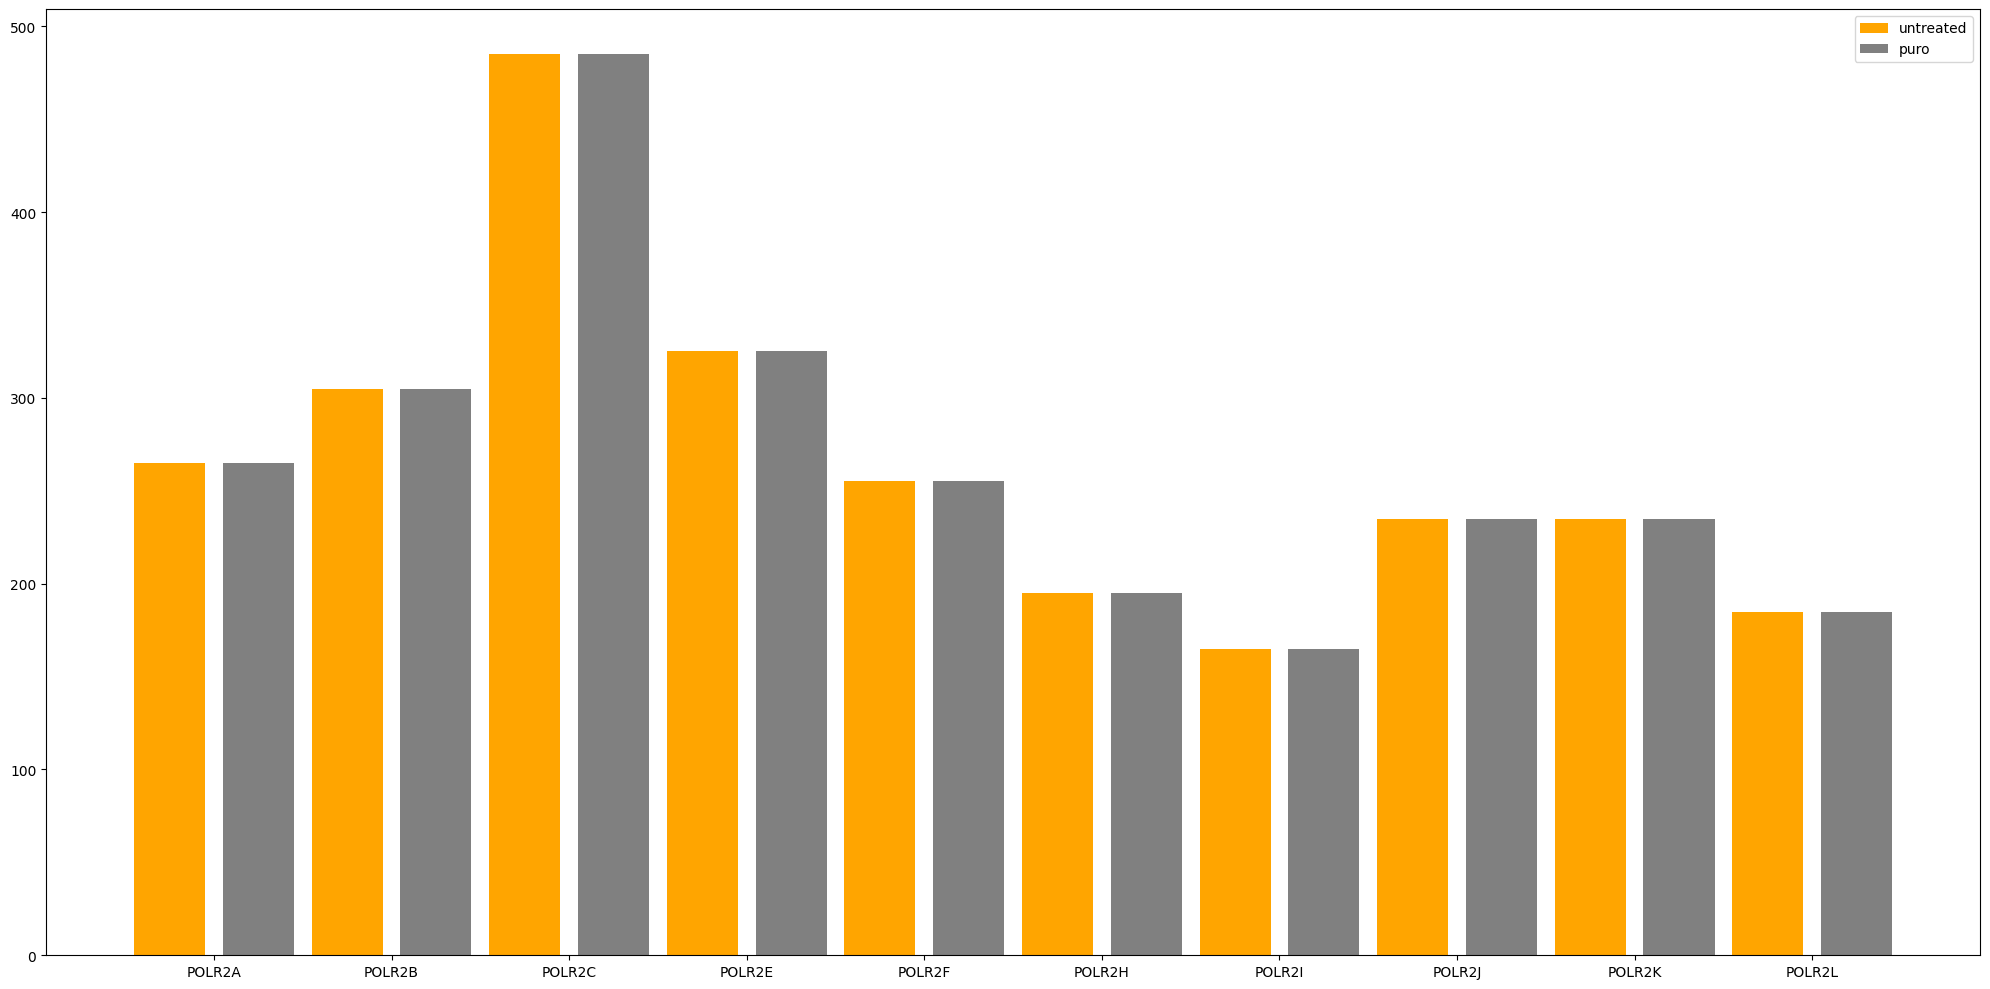

In [347]:
import matplotlib.pyplot as plt
import numpy as np

grouped_data = Detection_data.groupby(['treatment', 'target'])['threshold'].apply(pd.unique).apply(list).agg([len,list.pop])
grouped_data = grouped_data.rename(columns={'pop' : 'threshold'})
grouped_data = grouped_data.reset_index(drop=False)
assert (grouped_data['len'] == 1).all() #assert threshold is unique for (treatment,target)

threshold_fig = plt.figure(figsize=(20,10), frameon=False)
ax = threshold_fig.gca()

unt_index = grouped_data[grouped_data['treatment'] == "untreated"].index
puro_index = grouped_data[grouped_data['treatment'] == "puro"].index

positons = np.arange(len(unt_index))

ax.bar(
    x=positons - 0.25,
    height=grouped_data.loc[unt_index]['threshold'],
    color = 'orange',
    width= 0.4,
    label = 'untreated'
)
ax.bar(
    x=positons + 0.25,
    height=grouped_data.loc[puro_index]['threshold'],
    color = 'gray',
    width= 0.4,
    label= 'puro'
)

ax.set_xticks(positons , grouped_data.loc[unt_index]['target'])
ax.legend()

plt.tight_layout()
plt.show()


## save fig

In [348]:
import os
output_path = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/analyse_sous_unite_polymerase/"
folder_name = ""
os.makedirs(f"{output_path}/{folder_name}/", exist_ok=True)
threshold_fig.savefig(f"{output_path}/{folder_name}/thresholds.svg")


# Filtering statistics

## Load data

In [349]:
import pandas as pd
import os
from Sequential_Fish.analysis.distributions import merge_data, safe_merge_no_duplicates
from Sequential_Fish.analysis.post_processing import RNA_filtering

In [350]:
Run_1 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-09-03 - SeqFISH_Run8 - HeLa_POLR2" # no puro
Run_2 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-10-09 - SeqFISH_Run10 - HeLa-Puro_POLR2"  # puro
output_path = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/analyse_sous_unite_polymerase/"
folder_name = "filtering statistics"
os.makedirs(f"{output_path}/{folder_name}/", exist_ok=True)

In [351]:
Spots_data = pd.DataFrame()
Cell_data = pd.DataFrame()
for path, treatment in zip([Run_1, Run_2], ["untreated", "puro"]) :

    print(f"TREATMENT : ",treatment)

    Acquisition = pd.read_feather(path + "/result_tables/Acquisition.feather")
    Detection = pd.read_feather(path + "/result_tables/Detection.feather")
    Spots = pd.read_feather(path + "/result_tables/Spots.feather")
    Gene_map = pd.read_feather(path + "/result_tables/Gene_map.feather")
    Cell = pd.read_feather(path + "/result_tables/Cell.feather")
    
    Detection, Cell, Spots = merge_data(
        Acquisition=Acquisition,
        Detection=Detection,
        Cell=Cell,
        Spots=Spots,
        Gene_map=Gene_map
    )
    
    Spots['treatment'] = treatment
    Spots['path'] = path
    
    Cell['treatment'] = treatment
    Cell['path'] = path
    
    Spots_data = pd.concat([
        Spots_data,
        Spots,
    ],axis=0).reset_index(drop=True)
    
    Cell_data = pd.concat([
        Cell_data,
        Cell,
    ],axis=0).reset_index(drop=True)


TREATMENT :  untreated
TREATMENT :  puro


In [352]:
Gene_map = pd.read_feather(Run_2 + "/result_tables/Gene_map.feather").rename(columns={'target' : 'target_test'})
sample = Spots_data.loc[Spots_data['treatment'] == 'puro']
sample = safe_merge_no_duplicates(
    sample,
    Gene_map,
    on=['cycle','color_id'],
    keys= 'target_test'
)

In [353]:
test = sample.groupby(['cycle']).agg({
    'acquisition_id' : 'nunique',
    # 'cycle' : 'nunique',
    'color_id' : 'nunique',
    'target' : 'nunique',
    'target_test' : 'nunique',
})

print((test == 1).all(axis=0))
test

acquisition_id    False
color_id           True
target             True
target_test        True
dtype: bool


,acquisition_id,color_id,target,target_test
cycle,,,,
0,10,1,1,1
1,10,1,1,1
2,10,1,1,1
3,10,1,1,1
4,10,1,1,1
5,10,1,1,1
6,10,1,1,1
7,8,1,1,1
8,10,1,1,1


## Rename targets

optional if targets needs renaming

In [354]:
Spots_data.groupby(['treatment', 'cycle'])['target'].unique()

treatment  cycle
puro       0            [POLR2A_0]
           1         [Washout_1_0]
           2              [POLR2K]
           3         [Washout_3_0]
           4              [POLR2I]
           5         [Washout_5_0]
           6              [POLR2L]
           7         [Washout_7_0]
           8              [POLR2J]
           9         [Washout_9_0]
           10             [POLR2H]
           11       [Washout_11_0]
           12             [POLR2F]
           13       [Washout_13_0]
           14             [POLR2E]
           15       [Washout_15_0]
           16             [POLR2C]
           17       [Washout_17_0]
           18             [POLR2B]
           19       [Washout_19_0]
           20          [POLR2A_20]
           21       [Washout_21_0]
untreated  0              [POLR2A]
           1         [Washout_1_0]
           2              [POLR2B]
           3         [Washout_3_0]
           4              [POLR2C]
           5         [Washout_5_0]
   

In [355]:
rule = {
    'POLR2A_0' : 'POLR2A' 
}

Cell_data['target'] = Cell_data['target'].replace(rule)
Spots_data['target'] = Spots_data['target'].replace(rule)

## Washout filtering

In [356]:
washout_data = Spots_data.groupby(['treatment','cycle','target']).agg({
    'is_washout' : 'sum'
})

washout_data.loc['untreated']

,,is_washout
cycle,target,
0,POLR2A,0
1,Washout_1_0,115
2,POLR2B,6
3,Washout_3_0,18
4,POLR2C,2
5,Washout_5_0,38
6,POLR2E,6
7,Washout_7_0,141
8,POLR2F,11


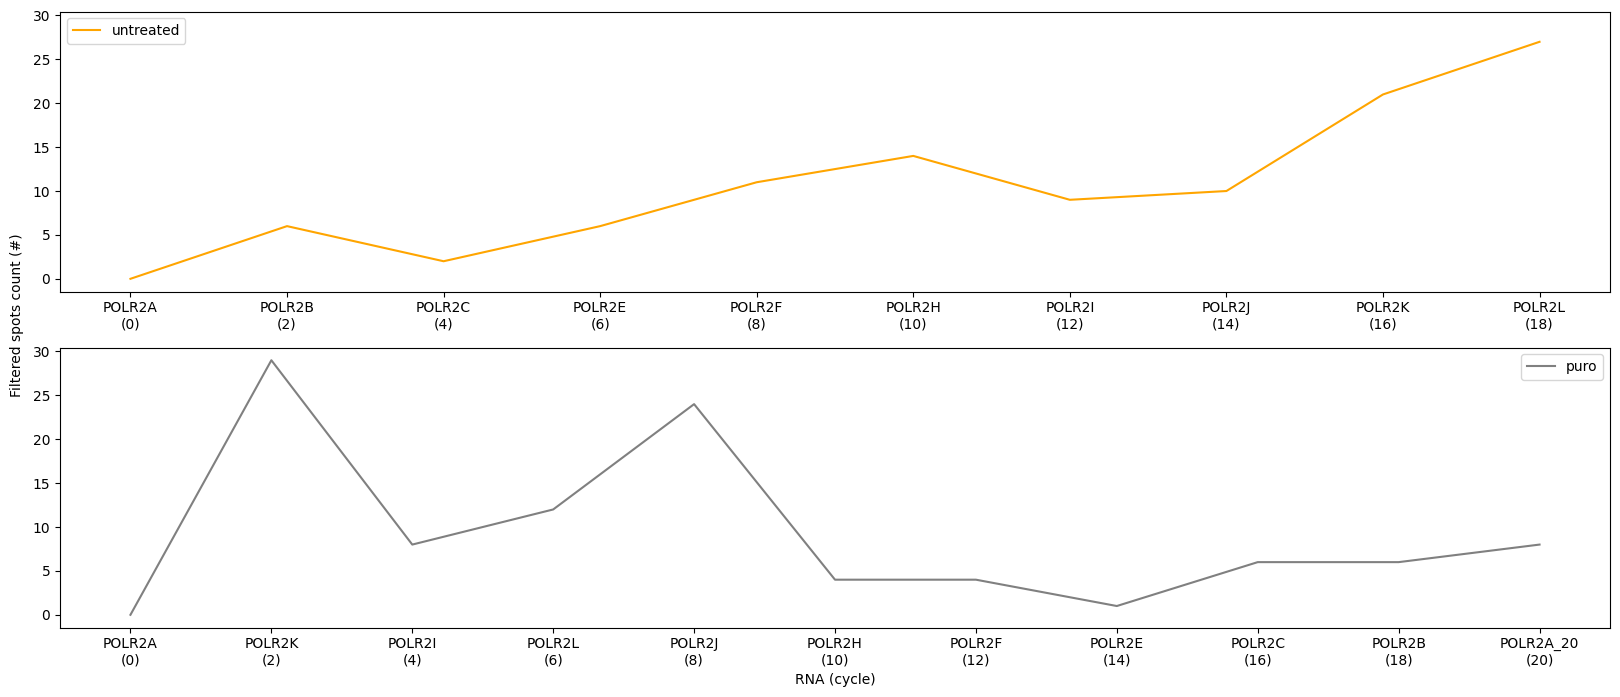

In [357]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,8), frameon=False)

labels = ['untreated', 'puro']
colors = ['orange', 'gray']

axes:'list[plt.Axes]' = fig.subplots(len(labels),1, sharey=True)

washout_are_uneven_numbers = True

if washout_are_uneven_numbers : modulo = 0 #then look for even numbers


for label, color, ax in zip(labels, colors, axes) :
    data = washout_data.loc[label]
    data = data[(data.index.get_level_values(0) %2 == modulo)]
    
    x = np.arange(len(data))
    y = data['is_washout']
    ax.plot(x,y,label=label,color=color)
    ax.legend()
    
    cycles = data.index.get_level_values(0)
    targets = data.index.get_level_values(1)
    xlabels = [f"{target}\n({cycle})" for target, cycle in zip(targets,cycles)]
    ax.set_xticks(x, xlabels)


fig.text(0.1, 0.5, 'Filtered spots count (#)', va='center', rotation='vertical')
ax.set_xlabel('RNA (cycle)')

fig.savefig(f"{output_path}/{folder_name}/washout_filter.svg")


## Cell (Segmentation) & Edge filtering

In [358]:
spots_count_per_cell = Spots_data.groupby(['treatment','location','cell_label']).agg({
    'spot_id' : 'count',
    'target' : 'nunique',
})
spots_count_per_cell

spot_id  target
treatment location    cell_label                 
puro      Location-01 0.0           11319      14
                      1.0             417      11
                      2.0             115      10
                      3.0             517      11
                      4.0             636      12
...                                   ...     ...
untreated Location-10 41.0            136      10
                      42.0            336      11
                      43.0            491      12
                      44.0            308      10
                      45.0            590      11

[894 rows x 2 columns]

In [359]:
remaining_cells = Cell_data.rename(columns={"label" : "cell_label"}).groupby(['treatment','location','cell_label'])['cell_id'].nunique()
print((remaining_cells == 1).all())
remaining_cells

True


treatment  location     cell_label
puro       Location-01  6             1
                        7             1
                        8             1
                        9             1
                        10            1
                                     ..
untreated  Location-10  36            1
                        37            1
                        38            1
                        39            1
                        40            1
Name: cell_id, Length: 698, dtype: int64

In [360]:
spots_count_per_cell_before_filter = spots_count_per_cell.copy()
# spots_count_per_cell_after_filter = pd.merge(spots_count_per_cell, remaining_cells, how='inner',left_index=True, right_index=True)
spots_count_per_cell['not_on_edge'] = spots_count_per_cell.index.isin(remaining_cells.index)
spots_count_per_cell = spots_count_per_cell.rename(columns={'spot_id' : 'spot_count'})

In [361]:
spots_count_per_cell

spot_count  target  not_on_edge
treatment location    cell_label                                 
puro      Location-01 0.0              11319      14        False
                      1.0                417      11        False
                      2.0                115      10        False
                      3.0                517      11        False
                      4.0                636      12        False
...                                      ...     ...          ...
untreated Location-10 41.0               136      10        False
                      42.0               336      11        False
                      43.0               491      12        False
                      44.0               308      10        False
                      45.0               590      11        False

[894 rows x 3 columns]

In [362]:
total_filtered = spots_count_per_cell[~spots_count_per_cell['not_on_edge']].groupby('treatment', level=0).agg({
    'spot_count' : ['sum', 'count']
})
total_filtered.columns = pd.Index(['spot_count','cell_count'])
total_filtered

,spot_count,cell_count
treatment,,
puro,140502,104
untreated,69918,92


In [363]:
total_remaining = spots_count_per_cell[spots_count_per_cell['not_on_edge']].groupby('treatment', level=0).agg({
    'spot_count' : ['sum', 'count']
})
total_remaining.columns = pd.Index(['spot_count','cell_count'])
total_remaining

,spot_count,cell_count
treatment,,
puro,431869,381
untreated,269076,317


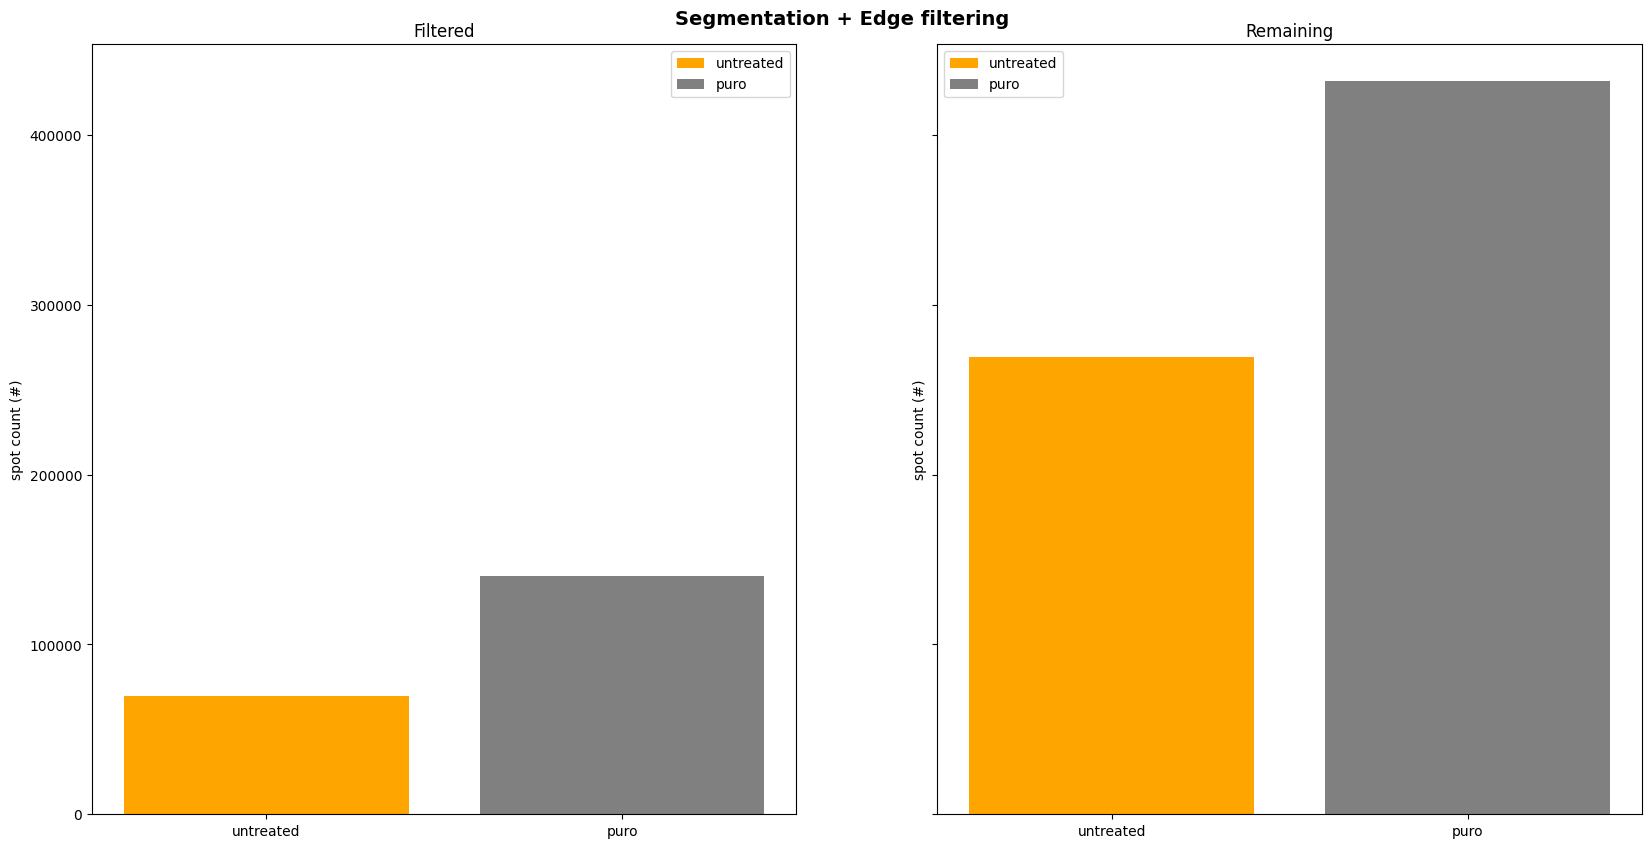

In [364]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20,10),frameon=False)
left,right = fig.subplots(1,2, sharey=True)

labels = ['untreated','puro']
colors = ['orange','gray']

x = np.arange(len(labels))

left.bar(x,total_filtered.loc[labels]['spot_count'], color =colors, label= labels)
left.set_ylabel('spot count (#)')
left.legend()
left.set_xticks(x,labels)
left.set_title("Filtered")

right.bar(x,total_remaining.loc[labels]['spot_count'], color =colors, label= labels)
right.set_ylabel('spot count (#)')
right.legend()
right.set_xticks(x,labels)
right.set_title("Remaining")

fig.text(x=0.5, y=0.90, ha='center', s="Segmentation + Edge filtering", fontdict={'weight' : 'bold', 'size' : '14'})
fig.savefig(f"{output_path}/{folder_name}/Segmentation_spots_filtering.svg")

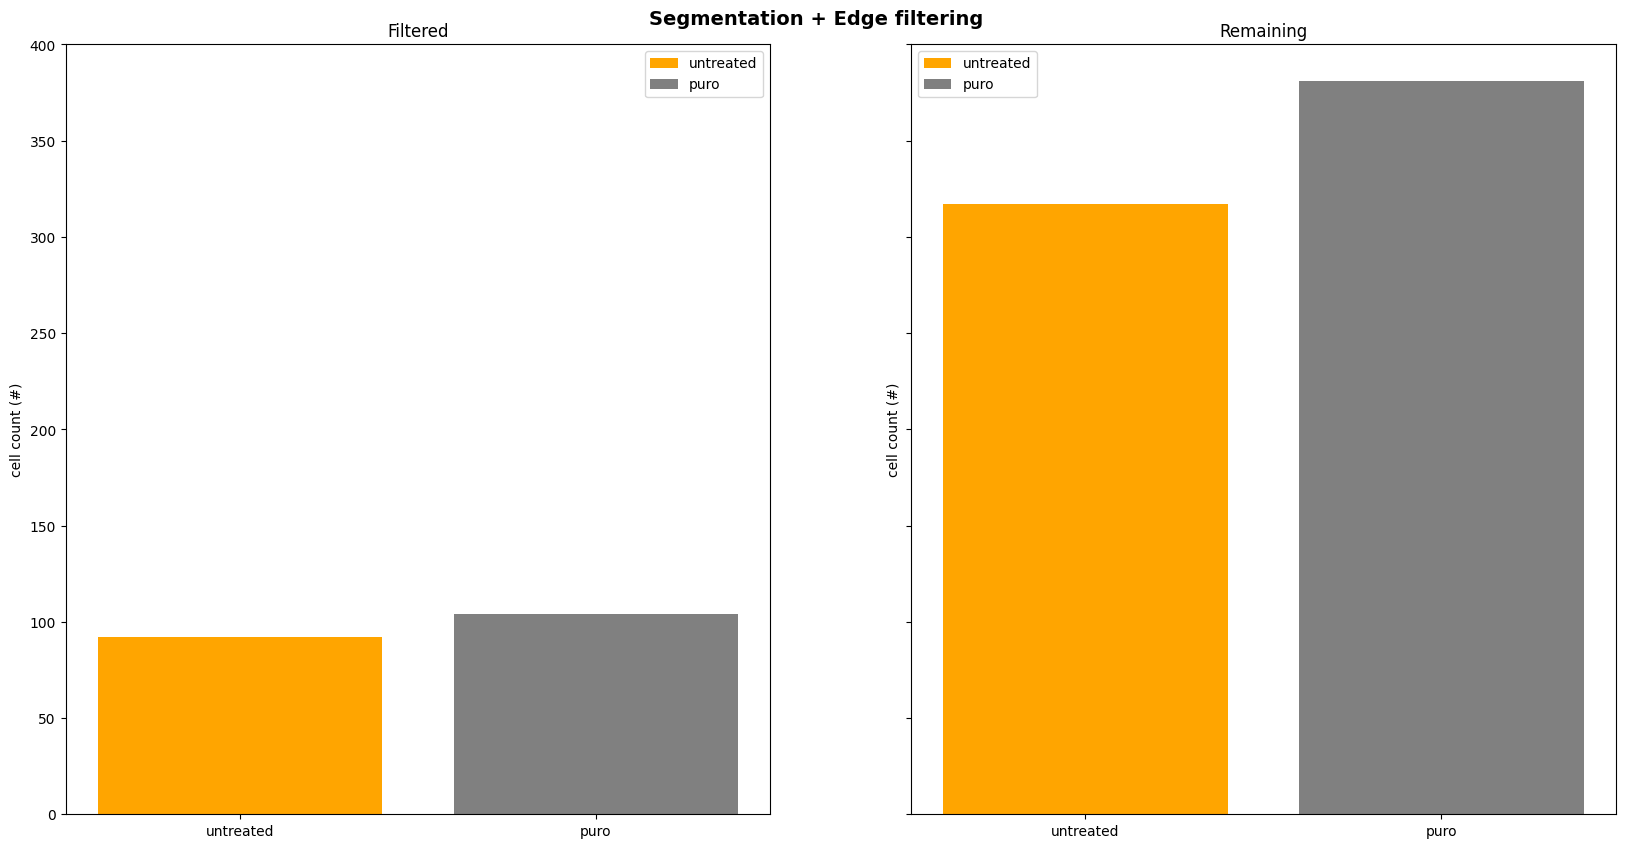

In [365]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20,10),frameon=False)
left,right = fig.subplots(1,2, sharey=True,)

labels = ['untreated','puro']
colors = ['orange','gray']

x = np.arange(len(labels))

left.bar(x,total_filtered.loc[labels]['cell_count'], color =colors, label= labels)
left.set_ylabel('cell count (#)')
left.legend()
left.set_xticks(x,labels)
left.set_title("Filtered")

right.bar(x,total_remaining.loc[labels]['cell_count'], color =colors, label= labels)
right.set_ylabel('cell count (#)')
right.legend()
right.set_xticks(x,labels)
right.set_title("Remaining")

fig.text(x=0.5, y=0.90, ha='center', s="Segmentation + Edge filtering", fontdict={'weight' : 'bold', 'size' : '14'})
fig.savefig(f"{output_path}/{folder_name}/Segmentation_cells_filtering.svg")
